In [72]:
import pandas as pd

In [73]:
df=pd.read_csv("ABC Company.xlsx - Sheet1.csv")
print(df.to_string())

                         Name                    Team  Number Position  Age  Height  Weight                College      Salary
0               Avery Bradley          Boston Celtics       0       PG   25  06-Feb     180                  Texas   7730337.0
1                 Jae Crowder          Boston Celtics      99       SF   25  06-Jun     235              Marquette   6796117.0
2                John Holland          Boston Celtics      30       SG   27  06-May     205      Boston University         NaN
3                 R.J. Hunter          Boston Celtics      28       SG   22  06-May     185          Georgia State   1148640.0
4               Jonas Jerebko          Boston Celtics       8       PF   29  06-Oct     231                    NaN   5000000.0
5                Amir Johnson          Boston Celtics      90       PF   29  06-Sep     240                    NaN  12000000.0
6               Jordan Mickey          Boston Celtics      55       PF   21  06-Aug     235                    

In [74]:
#Preprocessing:
#● Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
#Ensure data consistency and integrity before proceeding with analysis.
import numpy as np
length=len(df)
print(length)
df["Height"]=np.random.randint(150,181,size=length)
print(df.to_string())


458
                         Name                    Team  Number Position  Age  Height  Weight                College      Salary
0               Avery Bradley          Boston Celtics       0       PG   25     161     180                  Texas   7730337.0
1                 Jae Crowder          Boston Celtics      99       SF   25     166     235              Marquette   6796117.0
2                John Holland          Boston Celtics      30       SG   27     175     205      Boston University         NaN
3                 R.J. Hunter          Boston Celtics      28       SG   22     175     185          Georgia State   1148640.0
4               Jonas Jerebko          Boston Celtics       8       PF   29     154     231                    NaN   5000000.0
5                Amir Johnson          Boston Celtics      90       PF   29     170     240                    NaN  12000000.0
6               Jordan Mickey          Boston Celtics      55       PF   21     150     235                

In [75]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

<Axes: ylabel='Salary'>

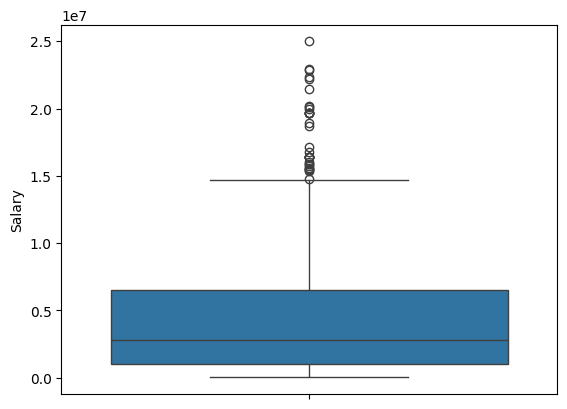

In [76]:
df['Salary'].mean()
import seaborn as sns
sns.boxplot(df['Salary'])

In [77]:
#This dataset contains NaN values in columns "College" and "Salary". So we have to fix these columns as well.

#for "Salary", I use 'replace with mean salary ' method.
df["Salary"].fillna(df["Salary"].median(),inplace=True)
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,161,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,166,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,175,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,175,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,154,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,153,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,154,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,171,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,157,231,Kansas,947276.0


In [105]:
#for "College", I replace NaN with mode .
df["College"].fillna(df["College"].mode()[0],inplace=True)

#format salary column to float
#df['Salary'] = df['Salary'].astype(float)
#df


In [79]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [80]:
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
teamDistribution=df['Team'].value_counts()
print(teamDistribution)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


In [81]:
#calculate the percentage split relative to the total number of employees
percentage_split=df['Team'].value_counts(normalize=True)*100
percentage_split


Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
Milwaukee Bucks           3.493450
New York Knicks           3.493450
Boston Celtics            3.275109
Los Angeles Clippers      3.275109
Los Angeles Lakers        3.275109
Phoenix Suns              3.275109
Sacramento Kings          3.275109
Brooklyn Nets             3.275109
Philadelphia 76ers        3.275109
Toronto Raptors           3.275109
Golden State Warriors     3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Houston Rockets           3.275109
San Antonio Spurs         3.275109
Atlanta Hawks             3.275109
Dallas Mavericks          3.275109
Charlotte Hornets         3.275109
Miami Heat                3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Orlando Magic  

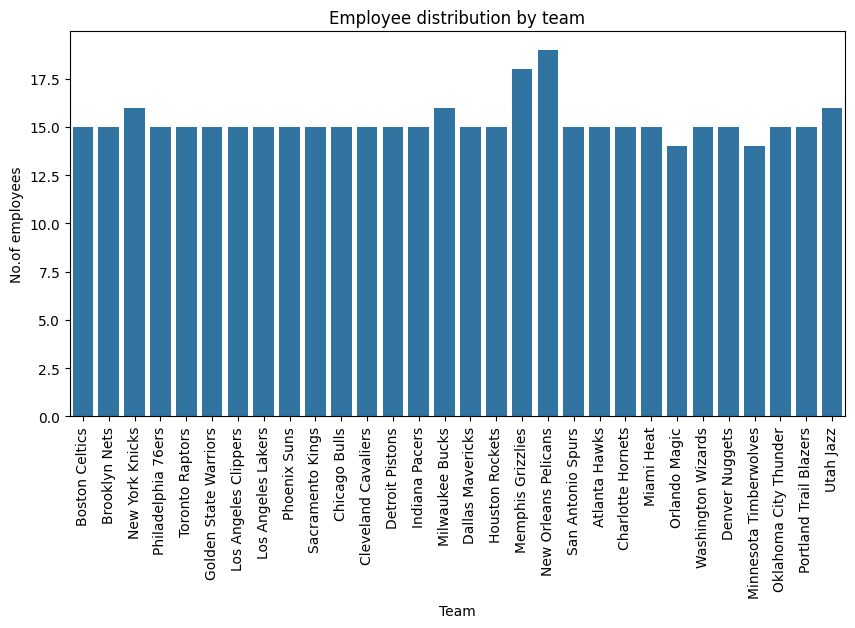

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x="Team",data=df)
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.ylabel("No.of employees")
plt.title("Employee distribution by team")
plt.show()

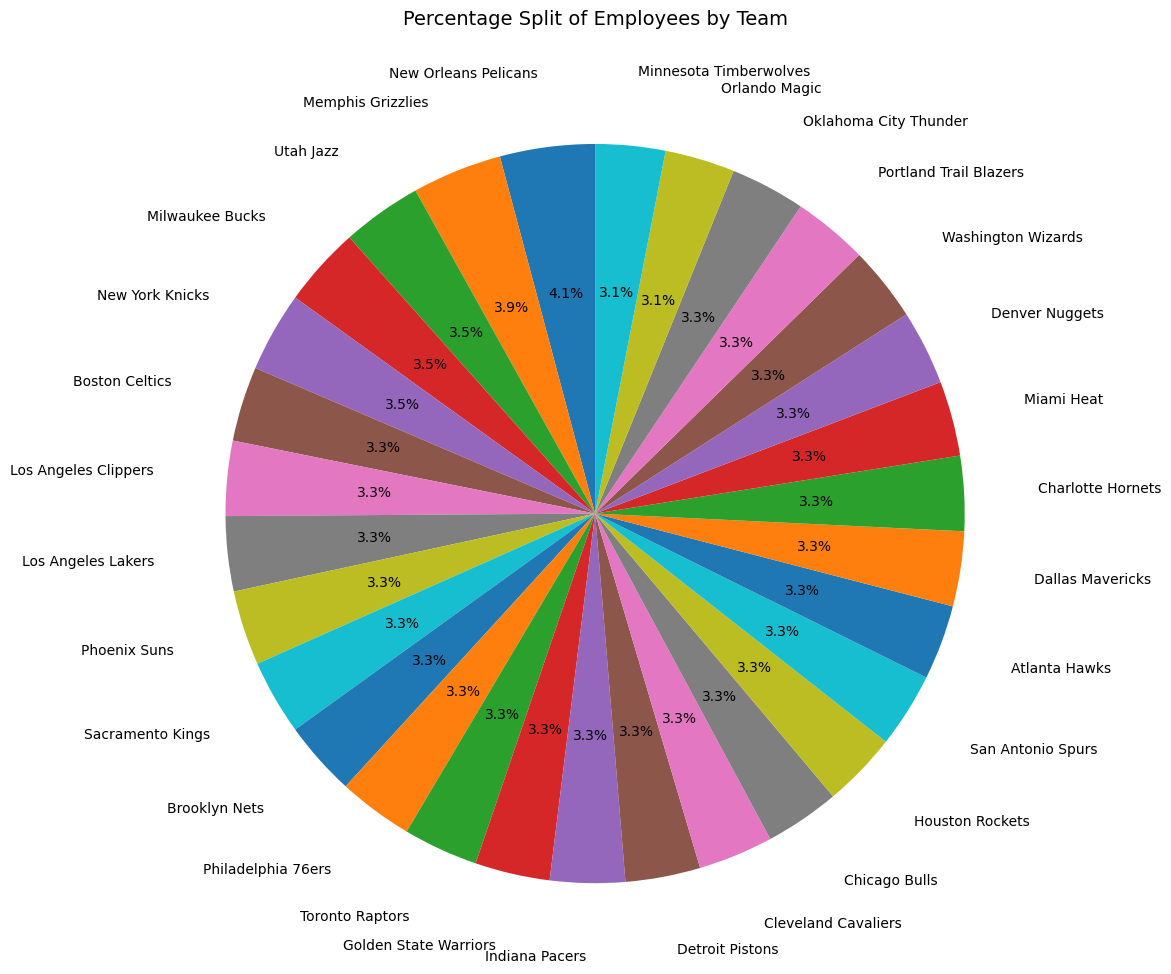

In [107]:
plt.pie(teamDistribution,labels=teamDistribution.index,autopct='%1.1f%%', startangle=90,labeldistance=1.2,radius=2.5)
plt.title("Percentage Split of Employees by Team", fontsize=14,y=1.8)
plt.show()


In [84]:
#Insights
#The employee distribution across the teams is nearly uniform. Majority of team consist of 14 to 16 employees.
#Also most of the the percentage relative to the total number of employees lies in the range of 3.3% 
#New Orleans Pelicans has the higher percentage, 4.1% whereas 'Minnesota' and 'Orlando magic have 3.1% which seems to be the minimum percentage value in the dataset.
#Teams are generally well-balanced in size, which suggests consistent staffing policies. Slightly larger teams may indicate higher workload or project volume.

In [109]:
#Segregate employees based on their positions within the company.
#employee_position=df.groupby('Position').sum()
#print(employee_position)
emp_pos=df['Position'].value_counts()
emp_pos

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [86]:
print(emp_pos.index)
print(emp_pos.values)

Index(['SG', 'PF', 'PG', 'SF', 'C'], dtype='object', name='Position')
[102 100  92  85  79]


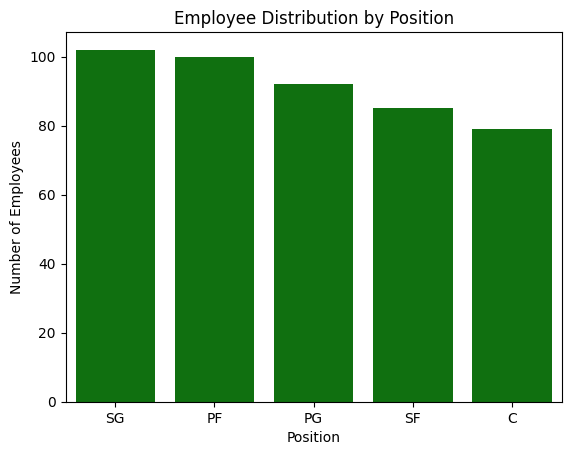

In [87]:

sns.barplot(x=emp_pos.index, y=emp_pos.values,color="green")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Position")
plt.show()

In [88]:
#Insights
#Positions "SG","PF" and "PG" have the highest count. So we can say that the company require more people for the positions SG,PF and PG.
#Position "C" has the lowest count, that means fewer employees are required for position C in the company.
#The company requires more talent in SG role, likely due to these roles being central to core operations.
#On the other hand, C appears to be a specialized or less frequently required role.

In [89]:
#3.Identify the predominant age group among employees.

age_count=df["Age"].value_counts().sort_values(ascending=False)
print(age_count)

print("predominant age group and count is:\n",age_count.head(1))

Age
24    47
25    46
27    41
23    41
26    36
30    31
28    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
19     2
39     2
Name: count, dtype: int64
predominant age group and count is:
 Age
24    47
Name: count, dtype: int64


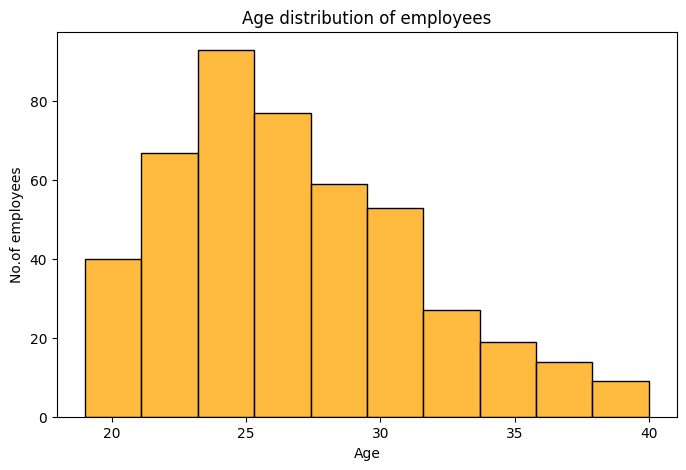

In [90]:
plt.figure(figsize=(8,5))
sns.histplot(x=df['Age'],bins=10,color="orange")
plt.xlabel("Age")
plt.ylabel("No.of employees")
plt.title("Age distribution of employees")
plt.show()

In [91]:
#Insights
#The age range 23 to 27 has the most employees.That means the company has more younger employees especially in the range of 23 to 27.
#The number of employees reduced drastically when the age comes in the range of 37 to 40.
#This company might give more focus on newly graduated and experienced employees. And the employees with age between 37 to 40 might be designated as lead roles.


In [110]:
# 4.Discover which team and position have the highest salary expenditure.

#top salaried employee in the company
top_salary=df["Salary"].max()
df1=df.loc[df["Salary"]==top_salary]
df1



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,173,212,Kentucky,25000000.0


In [111]:
#Team with Highest Salary Expenditure
team_salary=df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
team_salary.astype(int)


Team
Cleveland Cavaliers       109824875
Los Angeles Clippers       94854640
Oklahoma City Thunder      93765298
Golden State Warriors      88868997
Miami Heat                 88188045
Memphis Grizzlies          87895624
Chicago Bulls              86783378
San Antonio Spurs          84442733
New Orleans Pelicans       82750774
Charlotte Hornets          78340920
Washington Wizards         76328636
Houston Rockets            75283021
New York Knicks            73303898
Atlanta Hawks              72902950
Los Angeles Lakers         71770431
Sacramento Kings           71683666
Dallas Mavericks           71198732
Toronto Raptors            71117611
Milwaukee Bucks            69603517
Detroit Pistons            67168263
Indiana Pacers             66751826
Utah Jazz                  64007367
Phoenix Suns               63445135
Denver Nuggets             62958116
Minnesota Timberwolves     62545883
Boston Celtics             61377254
Orlando Magic              60161470
Brooklyn Nets          

In [94]:
#Position with Highest Salary Expenditure
position_salary=df.groupby("Position")["Salary"].sum().sort_values(ascending=False)
position_salary.astype(int)


Position
C     466377332
PG    458193715
PF    451069408
SF    410857162
SG    405484816
Name: Salary, dtype: int64

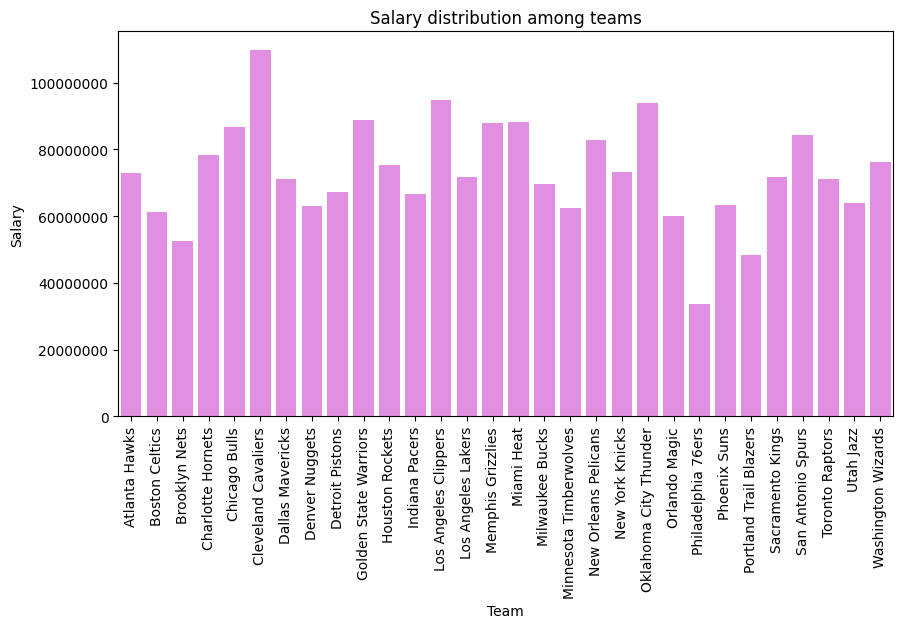

In [112]:
team_salary=df.groupby("Team")["Salary"].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=team_salary.index,y=team_salary.values,color="violet")
plt.title("Salary distribution among teams")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [96]:
#Insights
#This shows the total salary paid by each team.
#We can ay that team 'Cleveland Cavaliers' has the highest salary in the company whereas team 'Philadelphia 76ers' has the lowest salary.

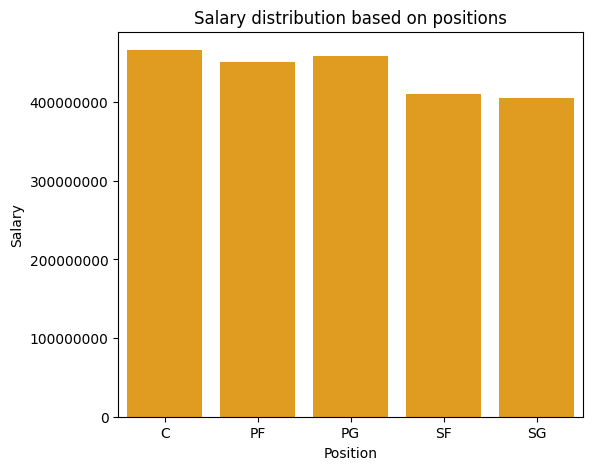

In [97]:
position_salary=df.groupby("Position")["Salary"].sum()
plt.figure(figsize=(6,5))
sns.barplot(x=position_salary.index,y=position_salary.values,color="orange")
plt.title("Salary distribution based on positions")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [98]:
#Insights
#The highest salary is spent on position 'C' where as the lowest salary soent on positon "SG".
#This also shows how much salary is spent on each position in the company.
#High salary spending for position C indicates it may require highly specialized skills or experience.
#Lower salary totals for SG suggest either larger numbers of junior employees or lower market valuation for that role.

In [99]:
#5.Investigate if there's any correlation between age and salary, and represent it visually.
df_corr=df.select_dtypes(include="number")

In [100]:
df_corr.corr()

,Number,Age,Height,Weight,Salary
Number,1.000000,0.027702,0.027182,0.207459,-0.112627
Age,0.027702,1.000000,-0.061907,0.086806,0.209124
Height,0.027182,-0.061907,1.000000,-0.012387,0.009587
Weight,0.207459,0.086806,-0.012387,1.000000,0.137938
Salary,-0.112627,0.209124,0.009587,0.137938,1.000000


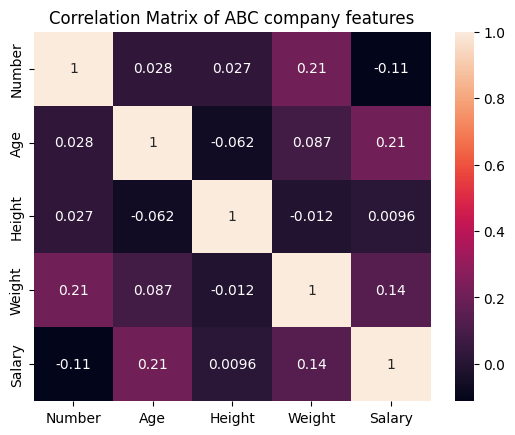

In [113]:
sns.heatmap(df_corr.corr(),annot=True)
plt.title('Correlation Matrix of ABC company features')
plt.show()

In [114]:
#The correlation between Age and Salary is 0.209124 which is between -1 and +1. So we can tell that this is a positive correlation.
#That means, as Age increases the Salary tends to increase as well.
#Also this correlation 0.209124 is closer to 0 indicates a weak linear relationship.
#Conclusion: This is a weak positive linear correlation between Age and Salary. 
# Older individuals tend to earn slightly higher salary, but Age is not a strog predictor of Salary on it's own forthis daaset

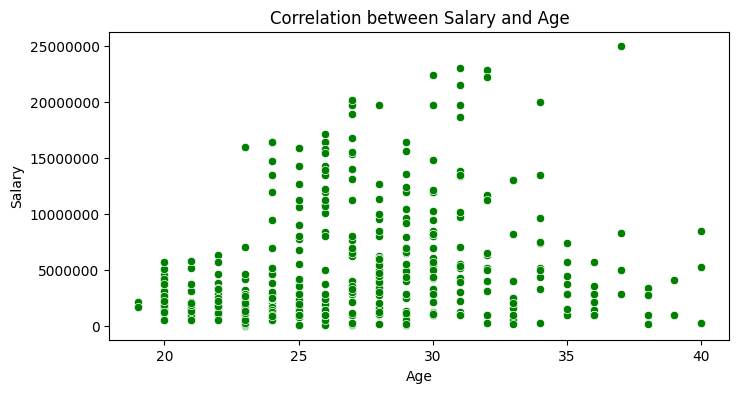

In [115]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Age",y="Salary",data=df,color="green")
plt.title("Correlation between Salary and Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.ticklabel_format(style='plain', axis='y')
plt.show()